In [3]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split 
from catboost import CatBoostClassifier
#from imblearn.over_sampling import SMOTE

In [6]:
# -----------------------------
# Найдём строки с предсказанием 1
# -----------------------------
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

positive_idx = (y_pred == 1).nonzero()[0]

print("Индексы строк с предсказанием 1:", positive_idx)

if len(positive_idx) > 0:
    sample = X_test.iloc[positive_idx[0]]
    print("Пример строки с предсказанием 1:")
    print(sample.to_dict())


NameError: name 'model' is not defined

In [ ]:
def find_value_columns(df: pd.DataFrame, value: str):
    cols = []
    for col in df.columns:
        # безопасная проверка на вхождение значения
        try:
            if df[col].astype(str).eq(value).any():
                cols.append(col)
        except Exception:
            pass
    return cols

targets = ["HbolMJUevblAbkHClEQa", "card_web"]
for v in targets:
    cols_with_v = find_value_columns(df, v)
    print(v, "->", cols_with_v)


HbolMJUevblAbkHClEQa -> ['hit_referer', 'event_label', 'hit_revent_labeleferer']
card_web -> ['event_category']


In [ ]:
df.columns.to_list()

['Unnamed: 0.1',
 'Unnamed: 0',
 'hit_number',
 'hit_referer',
 'event_category',
 'event_action',
 'event_label',
 'visit_number',
 'utm_medium',
 'device_category',
 'device_brand',
 'device_screen_resolution',
 'device_browser',
 'geo_country',
 'geo_city',
 'hit_revent_labeleferer',
 'hour',
 'minute',
 'second',
 'visit_year',
 'visit_month',
 'visit_day',
 'visit_dayofweek',
 'visit_is_weekend',
 'hit_year',
 'hit_month',
 'hit_day',
 'hit_dayofweek',
 'hit_is_weekend',
 'brand',
 'model']

In [ ]:
df = df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"])
df.head()

,hit_number,hit_referer,event_category,event_action,event_label,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hit_revent_labeleferer,hour,minute,second,visit_year,visit_month,visit_day,visit_dayofweek,visit_is_weekend,hit_year,hit_month,hit_day,hit_dayofweek,hit_is_weekend,brand,model
0,30,unknown,quiz,quiz_show,unknown,2,cpc,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,unknown,13,7,36,2021,12,23,3,0,2021,12,23,3,0,unknown,unknown
1,41,unknown,quiz,quiz_show,unknown,2,banner,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,unknown,17,51,49,2021,12,23,3,0,2021,12,23,3,0,unknown,unknown
2,49,unknown,quiz,quiz_show,unknown,1,cpc,desktop,unknown,2560x1080,Chrome,Russia,Moscow,unknown,8,3,27,2021,12,23,3,0,2021,12,23,3,0,volkswagen,polo
3,46,unknown,quiz,quiz_show,unknown,9,cpc,mobile,Samsung,412x915,Chrome,Russia,Podolsk,unknown,1,10,14,2021,12,23,3,0,2021,12,23,3,0,unknown,unknown
4,79,unknown,quiz,quiz_show,unknown,1,(none),desktop,unknown,1536x864,Chrome,Estonia,Tallinn,unknown,16,11,18,2021,12,23,3,0,2021,12,23,3,0,mercedes-benz,cla-klasse


In [ ]:
df = df.drop(columns = ["hit_referer"])

In [ ]:
df = df.drop(columns="hit_revent_labeleferer")

In [ ]:
df.hit_referer.unique()

array(['unknown', 'VloVXNWduHeTjUoDkjkO', 'trXmoxcphNjuYcShOXwL', ...,
       'SyKCPVqPvVwsypNSfuig', 'KpKtMqJlrvgANamYaRSI',
       'tvGabHlPFDvTmIFiCKTL'], shape=(37827,), dtype=object)

In [ ]:
df = df.drop(columns="target")


In [ ]:
df.head()

,hit_number,event_category,event_action,event_label,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hour,minute,second,visit_year,visit_month,visit_day,visit_dayofweek,visit_is_weekend,hit_year,hit_month,hit_day,hit_dayofweek,hit_is_weekend,brand,model,target
0,30,quiz,quiz_show,unknown,2,cpc,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,13,7,36,2021,12,23,3,0,2021,12,23,3,0,unknown,unknown,0
1,41,quiz,quiz_show,unknown,2,banner,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,17,51,49,2021,12,23,3,0,2021,12,23,3,0,unknown,unknown,0
2,49,quiz,quiz_show,unknown,1,cpc,desktop,unknown,2560x1080,Chrome,Russia,Moscow,8,3,27,2021,12,23,3,0,2021,12,23,3,0,volkswagen,polo,0
3,46,quiz,quiz_show,unknown,9,cpc,mobile,Samsung,412x915,Chrome,Russia,Podolsk,1,10,14,2021,12,23,3,0,2021,12,23,3,0,unknown,unknown,0
4,79,quiz,quiz_show,unknown,1,(none),desktop,unknown,1536x864,Chrome,Estonia,Tallinn,16,11,18,2021,12,23,3,0,2021,12,23,3,0,mercedes-benz,cla-klasse,0


In [ ]:
y = (df["event_action"] == "sub_submit_success").astype(int) 
X = df.drop(columns=["event_action"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
cat_features = [
    
    "event_label",
    "utm_medium",
    "device_category",
    "device_brand",
    "device_screen_resolution",  # оставляем как категориальный
    "device_browser",
    "geo_country",
    "geo_city",
    "brand",
    "model"
]


In [ ]:


model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function="Logloss",
    cat_features=cat_features,
    class_weights=[1, 100],
    task_type="GPU",   # ключевой параметр
    devices="0"        # номер видеокарты, если их несколько
)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier, Pool

# -----------------------------
# 1. Целевая переменная
# -----------------------------
df["target"] = (df["event_action"] == "sub_submit_success").astype(int)

# -----------------------------
# 2. Список категориальных признаков
# -----------------------------
leaky_values = [
    "sub_submit", "greenday_sub_submit", "add_ad_publish_success",
    "add_ad_form", "add_ad_preview", "add_ad_photo", "add_ad_price",
    "add_ad_city", "wallet", "credit_buttons", "credit_landing_pos"
]

df["event_category_clean"] = df["event_category"].apply(
    lambda x: "leak" if x in leaky_values else x
)

# и теперь используем event_category_clean вместо event_category
cat_features = [
    "event_category_clean",
    "event_label",
    "utm_medium",
    "device_category",
    "device_brand",
    "device_screen_resolution",
    "device_browser",
    "geo_country",
    "geo_city",
    "brand",
    "model"
]

# -----------------------------
# 3. Очистка категориальных
# -----------------------------
for col in cat_features:
    df[col] = df[col].astype(str).fillna("unknown")

# -----------------------------
# 4. Train/Test Split
# -----------------------------
X = df.drop(columns=["event_action", "target", "event_category"])  # убираем исходную колонку
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 5. Обучение CatBoost на GPU
# -----------------------------
model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function="Logloss",
    cat_features=cat_features,
    class_weights=[1, 100],
    task_type="GPU",
    devices="0",
    verbose=100,
    early_stopping_rounds=50
)

model.fit(X_train, y_train, eval_set=(X_test, y_test))


# -----------------------------
# 6. Оценка качества
# -----------------------------
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

# -----------------------------
# 7. Feature Importance
# -----------------------------
fi = model.get_feature_importance(prettified=True)
fi_df = pd.DataFrame(fi, columns=["Feature", "Importance"]).sort_values("Importance", ascending=False)

print(fi_df.head(20))  # топ-20 признаков


0:	learn: 0.2982908	test: 0.2983259	best: 0.2983259 (0)	total: 1.32s	remaining: 11m 1s
100:	learn: 0.0000349	test: 0.0000184	best: 0.0000184 (97)	total: 1m 38s	remaining: 6m 28s
200:	learn: 0.0000318	test: 0.0000180	best: 0.0000179 (164)	total: 3m 24s	remaining: 5m 4s
bestTest = 1.769468617e-05
bestIteration = 221
Shrink model to first 222 iterations.
ROC-AUC: 0.9999996607005293
Confusion Matrix:
 [[3132988       5]
 [      0    3586]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000   3132993
           1     0.9986    1.0000    0.9993      3586

    accuracy                         1.0000   3136579
   macro avg     0.9993    1.0000    0.9997   3136579
weighted avg     1.0000    1.0000    1.0000   3136579

    Feature  Importance
0       NaN         NaN
1       NaN         NaN
2       NaN         NaN
3       NaN         NaN
4       NaN         NaN
5       NaN         NaN
6       NaN         NaN
7       NaN         NaN
8       NaN      

In [ ]:
# Получаем важности как массив чисел
fi_values = model.get_feature_importance()

# Привязываем их к именам колонок
fi_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": fi_values
}).sort_values("Importance", ascending=False)

print(fi_df.head(20))


                     Feature  Importance
25      event_category_clean   64.583649
10                      hour    4.407985
4            device_category    3.837393
14               visit_month    3.364686
7             device_browser    2.940842
1                event_label    2.905032
5               device_brand    2.082590
9                   geo_city    1.684699
20                   hit_day    1.569839
21             hit_dayofweek    1.551521
15                 visit_day    1.545879
19                 hit_month    1.406811
22            hit_is_weekend    1.166669
23                     brand    1.117875
3                 utm_medium    1.080642
16           visit_dayofweek    0.766675
6   device_screen_resolution    0.697017
0                 hit_number    0.694828
24                     model    0.600207
11                    minute    0.582595


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier

# -----------------------------
# 1. Целевая переменная
# -----------------------------
df["target"] = (df["event_action"] == "sub_submit_success").astype(int)

# -----------------------------
# 2. Список категориальных признаков (без event_category)
# -----------------------------
cat_features = [
    
    "utm_medium",
    "device_category",
    "device_brand",
    "device_screen_resolution",
    "device_browser",
    "geo_country",
    "geo_city",
    "brand",
    "model"
]

# -----------------------------
# 3. Очистка категориальных
# -----------------------------
for col in cat_features:
    df[col] = df[col].astype(str).fillna("unknown")

# -----------------------------
# 4. Train/Test Split
# -----------------------------
X = df.drop(columns=["event_action", "target", "event_category", "event_category_clean"])

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 5. Обучение CatBoost на GPU
# -----------------------------
model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function="Logloss",
    cat_features=cat_features,
    class_weights=[1, 100],
    task_type="GPU",   # RTX 5060 Ti
    devices="0",
    verbose=100,
    early_stopping_rounds=50
)

model.fit(X_train, y_train, eval_set=(X_test, y_test))

# -----------------------------
# 6. Оценка качества
# -----------------------------
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

# -----------------------------
# 7. Feature Importance
# -----------------------------
fi_values = model.get_feature_importance()
fi_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": fi_values
}).sort_values("Importance", ascending=False)

print(fi_df.head(20))


0:	learn: 0.5904005	test: 0.5903013	best: 0.5903013 (0)	total: 999ms	remaining: 8m 18s
100:	learn: 0.2617671	test: 0.2609015	best: 0.2609015 (100)	total: 1m 48s	remaining: 7m 9s
200:	learn: 0.2540527	test: 0.2562237	best: 0.2562237 (200)	total: 3m 31s	remaining: 5m 14s
300:	learn: 0.2483803	test: 0.2537306	best: 0.2537306 (300)	total: 5m 14s	remaining: 3m 27s
400:	learn: 0.2443953	test: 0.2525053	best: 0.2524925 (399)	total: 6m 55s	remaining: 1m 42s
499:	learn: 0.2406927	test: 0.2518392	best: 0.2518171 (497)	total: 8m 38s	remaining: 0us
bestTest = 0.2518170789
bestIteration = 497
Shrink model to first 498 iterations.
ROC-AUC: 0.8378963193097645
Confusion Matrix:
 [[3118514   14479]
 [   3173     413]]
              precision    recall  f1-score   support

           0     0.9990    0.9954    0.9972   3132993
           1     0.0277    0.1152    0.0447      3586

    accuracy                         0.9944   3136579
   macro avg     0.5134    0.5553    0.5209   3136579
weighted avg     

In [ ]:
df = df.drop(columns="event_label")

In [ ]:
import pandas as pd

# частоты по каждому event_label
label_stats = df.groupby("event_label")["target"].agg(["count", "sum", "mean"]).reset_index()

# сортируем по средней вероятности заказа
label_stats = label_stats.sort_values("mean", ascending=False)

print(label_stats.head(20))


                event_label  count    sum      mean
35690  uimgZZmhfLQwbKAZZfCk   2851   2845  0.997895
30485  nsPPIRqjxBefONGPpnsF  11823  11798  0.997885
8379   KuMiABMMbspIDDhiCNVS   5889   2675  0.454237
19666  ZZofswPTYfyzKOvStgaa     83     22  0.265060
38932  yrNVHowDbZsxjfjrrhyG   2221    588  0.264746
3      AAGLJJZhWYYDBsSjEFAf      1      0  0.000000
4      AAHrABypJqxaghKxHqGV      1      0  0.000000
5      AAKKkhPDjaWvktBzxBHA      5      0  0.000000
6      AANnKYLqJTiSaNmkcliR      1      0  0.000000
7      AAaOYBSKrleztcxuEyUC      9      0  0.000000
8      AAbranbHWyTMHJGkWBpl      6      0  0.000000
9      AAedYhLmLvMYgMnAFXBs      1      0  0.000000
10     AAftFMoyzYcHdAIvPdDC      1      0  0.000000
11     AAiLIFMBeTuEhUcXKksC      2      0  0.000000
12     AAjOMuobVUGTkWnMwrpn      1      0  0.000000
13     AAlUMnCxtaWviwnEagGM      1      0  0.000000
14     AAwYuGElddvmnlKCIOTj     10      0  0.000000
15     AAzVLgUpcSioccQQTEhZ      4      0  0.000000
16     ABGww

In [ ]:
for col in cat_features:
    X[col] = X[col].astype(str).fillna("unknown")


In [ ]:
print(X_train[cat_features].dtypes)
print(X_train[cat_features].head())


event_label                 object
utm_medium                  object
device_category             object
device_brand                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
brand                       object
model                       object
dtype: object
                   event_label utm_medium device_category device_brand  \
11857933  KclpemfoHstknWHFiLit     banner          mobile        Apple   
15295445               unknown     banner          mobile        Apple   
9400784   hAHqGICPFQiPwtzubOzs        cpc          mobile        Apple   
7441050   KclpemfoHstknWHFiLit     (none)          mobile        Apple   
12562982  KclpemfoHstknWHFiLit        cpc          mobile       Xiaomi   

         device_screen_resolution device_browser geo_country  \
11857933                  414x896         Safari      Russia   
15295445                  375x667         Safari      Russia   

In [ ]:
df[cat_features] = df[cat_features].astype(str)


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


ROC-AUC: 0.9999996080966501


[[3132988       5]
 [      0    3586]]


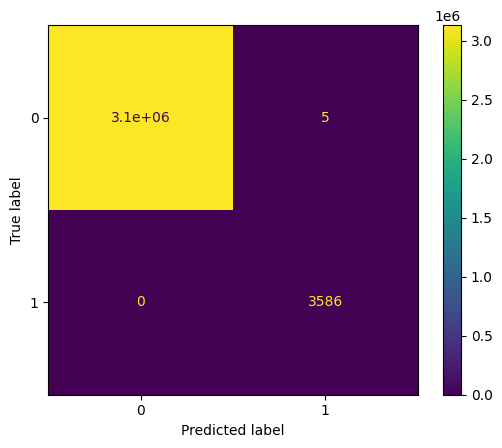

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# вероятности
y_pred_proba = model.predict_proba(X_test)[:,1]

# бинарные предсказания (порог 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)

# считаем матрицу
cm = confusion_matrix(y_test, y_pred)

# выводим
print(cm)

# визуализация
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# бинарные предсказания (порог 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# подробный отчёт по классам
print(classification_report(y_test, y_pred, digits=4))


Accuracy: 0.9999984059065625
Precision: 0.9986076301865775
Recall: 1.0
F1-score: 0.9993033300822071
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000   3132993
           1     0.9986    1.0000    0.9993      3586

    accuracy                         1.0000   3136579
   macro avg     0.9993    1.0000    0.9997   3136579
weighted avg     1.0000    1.0000    1.0000   3136579



                  Feature Id  Importances
0             event_category    89.696426
1            device_category     1.863022
2                event_label     1.584540
3                   geo_city     1.315673
4                    hit_day     0.814967
5             device_browser     0.714726
6                      brand     0.501984
7                visit_month     0.446823
8                 utm_medium     0.368479
9               device_brand     0.349707
10                      hour     0.310931
11                 visit_day     0.291751
12             hit_dayofweek     0.280689
13          visit_is_weekend     0.257290
14                     model     0.244713
15                hit_number     0.234277
16  device_screen_resolution     0.207164
17            hit_is_weekend     0.204815
18                 hit_month     0.180454
19                    minute     0.048029
20               geo_country     0.043454
21                    second     0.033926
22           visit_dayofweek     0

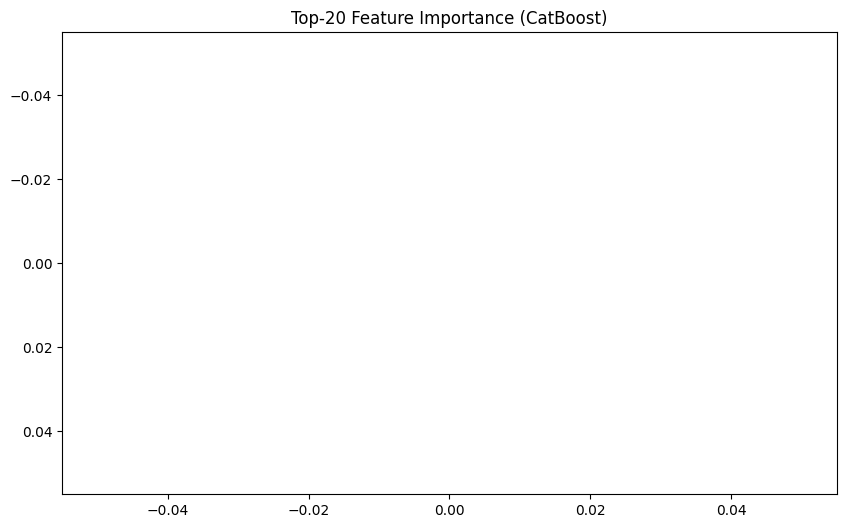

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# получаем важности признаков
fi = model.get_feature_importance(prettified=True)

# выводим таблицу
print(fi)

# визуализация топ-20 признаков
fi_df = pd.DataFrame(fi, columns=["Feature", "Importance"])
fi_df = fi_df.sort_values("Importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Top-20 Feature Importance (CatBoost)")
plt.show()


In [ ]:
df.event_category.unique()

array(['quiz', 'card_web', 'sub_page_view', 'search_form', 'auth', 'chat',
       'offers', 'ad_banner', 'navigation', 'profile_menu',
       'sub_button_click', 'listing_ads', 'cars', 'sub_submit',
       'main_banners', 'header', 'sap_search_form', 'active_invitation',
       'sap_search__form', 'footer', 'scrolling_main_page', 'my_idea',
       'phone', 'main_services', 'greenday_sub_button_click',
       'greenday_listing_ads', 'greenday_gtm.triggergroup',
       'credit_buttons', 'add_ad_vin', 'add_ad', 'category_tile',
       'greenday_sub_submit', 'pos_landing', 'add_ad_publish_success',
       'add_ad_city', 'add_ad_description',
       'add_ad_additional_information', 'add_ad_photo', 'wallet',
       'add_ad_preview', 'add_ad_form', 'main_advantages',
       'greenday_sub_page_view', 'greenday_card_web', 'add_ad_documents',
       'credit_landing_pos', 'add_ad_price', 'add_ad_options', 'jivosite',
       'tesla', 'app_banner', 'titul_form'], dtype=object)